In [33]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")

In [36]:
df.shape

(8763, 24)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   SBP                              8763 non-null   int64  
 4   DBP                              8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [38]:
df.sample(5)

,Age,Sex,Cholesterol,SBP,DBP,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
3795,88,Female,341,142,78,0,1,1,1,0,...,4,2.558515,36.296808,619,6,10,Thailand,Asia,Northern Hemisphere,0
483,70,Male,213,153,83,1,0,1,0,0,...,4,2.798991,30.839264,255,4,4,United Kingdom,Europe,Northern Hemisphere,0
8058,35,Male,362,114,68,1,0,1,0,0,...,9,4.316931,34.635492,458,5,4,United States,North America,Northern Hemisphere,0
6563,52,Female,182,103,87,1,0,1,1,0,...,1,8.257026,25.786160,752,3,7,Spain,Europe,Southern Hemisphere,0
1015,48,Male,181,139,71,0,0,1,1,0,...,1,7.589894,18.784914,714,1,8,France,Europe,Northern Hemisphere,0


In [39]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [40]:
df.isnull().sum()

Age                                0
Sex                                0
Cholesterol                        0
SBP                                0
DBP                                0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [41]:
df['Sex'].value_counts()

Sex
Male      6111
Female    2652
Name: count, dtype: int64

In [42]:
df['Age'].unique()

array([67, 21, 84, 66, 54, 90, 20, 43, 73, 71, 77, 60, 88, 69, 38, 50, 45,
       36, 48, 40, 79, 63, 27, 25, 86, 42, 52, 29, 30, 47, 44, 33, 51, 70,
       85, 31, 56, 24, 74, 72, 55, 26, 53, 46, 57, 22, 35, 39, 80, 65, 83,
       82, 28, 19, 75, 18, 34, 37, 89, 32, 49, 23, 59, 62, 64, 61, 76, 41,
       87, 81, 58, 78, 68], dtype=int64)

In [43]:
df['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [44]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [45]:
df.drop(['Country','Continent','Hemisphere'],axis=1,inplace=True)

In [46]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'SBP', 'DBP', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')

In [47]:
for col in df: 
    print(f'{col}:{df[col].unique()}')

Age:[67 21 84 66 54 90 20 43 73 71 77 60 88 69 38 50 45 36 48 40 79 63 27 25
 86 42 52 29 30 47 44 33 51 70 85 31 56 24 74 72 55 26 53 46 57 22 35 39
 80 65 83 82 28 19 75 18 34 37 89 32 49 23 59 62 64 61 76 41 87 81 58 78
 68]
Sex:['Male' 'Female']
Cholesterol:[208 389 324 383 318 297 358 220 145 248 373 374 228 259 122 379 166 303
 340 294 359 202 133 159 271 273 328 154 135 197 321 375 360 263 201 347
 129 229 251 121 190 185 279 336 192 180 203 368 222 243 218 120 285 377
 369 311 139 266 153 339 329 333 398 124 183 163 362 390 200 396 255 209
 247 250 227 246 223 330 195 194 178 155 240 237 216 276 224 326 198 301
 314 304 334 213 254 230 316 277 388 206 384 205 261 308 338 382 291 168
 171 378 253 245 226 281 123 173 231 234 268 306 186 293 161 380 239 149
 320 219 335 265 126 307 270 225 193 148 296 136 364 353 252 232 387 299
 357 214 370 345 351 344 152 150 131 272 302 337 170 356 274 188 125 138
 376 181 184 275 394 128 217 399 283 289 284 327 262 212 350 385 162 141
 361 244

In [48]:
df['Sex'] = df['Sex'].apply(lambda sex: 1 if sex == "Male" else 0)

In [49]:
le_diet = LabelEncoder()
df['Diet'] = le_diet.fit_transform(df['Diet'])

In [50]:
cols_to_scale = ['Age','Cholesterol','Exercise Hours Per Week','SBP','DBP','Stress Level','Sleep Hours Per Day','Physical Activity Days Per Week','Triglycerides','BMI','Sedentary Hours Per Day']
scalar = MinMaxScaler()
df[cols_to_scale] = scalar.fit_transform(df[cols_to_scale])

In [51]:
x = df.drop('Heart Attack Risk',axis=1)
y = df['Heart Attack Risk']

In [52]:
smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm = smote.fit_resample(x,y)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [54]:
x_train.shape,x_test.shape

((8998, 20), (2250, 20))

In [55]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred)

0.7004444444444444

In [58]:
print('Classification Report: \n',classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.81      0.73      1120
           1       0.76      0.59      0.66      1130

    accuracy                           0.70      2250
   macro avg       0.71      0.70      0.70      2250
weighted avg       0.71      0.70      0.70      2250



In [59]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[908, 212],
       [462, 668]], dtype=int64)

Text(45.722222222222214, 0.5, 'Truth')

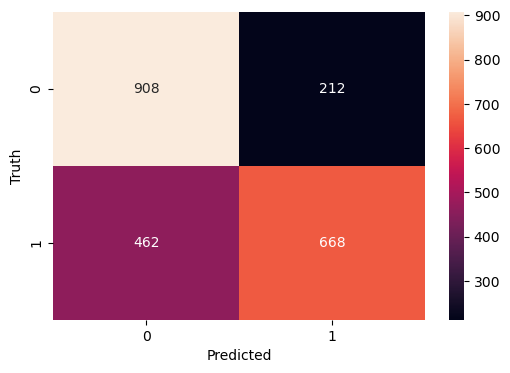

In [60]:
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')